# The Sparks Foundation

## Data Science and business analytics intern

#### Author - Vishwajeet Ghata
#### Task 1 : Prediction using Supervised ML
**In this project we have to predict the marks that a student can score based on the number of hours they have studied.**

In [1]:
#importing all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
# reading the data
marks_df = pd.read_csv('http://bit.ly/w-data')
marks_df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
marks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
marks_df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Since, there is no null value and data is clean let move on to the visualization part**

In [14]:
plt.rcParams['figure.figsize'] = (20,10)

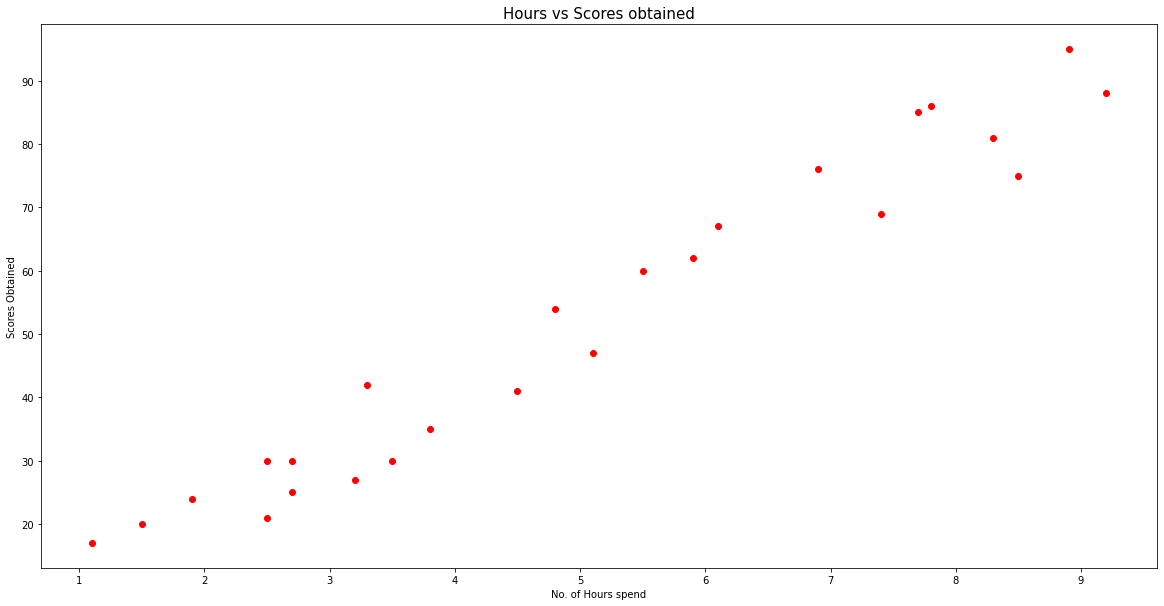

In [15]:
plt.scatter(x=marks_df['Hours'],y=marks_df['Scores'],c='red')
plt.xlabel('No. of Hours spend')
plt.ylabel('Scores Obtained')
plt.title('Hours vs Scores obtained',size=15)
plt.show()

1. From this graph we can observe that the student who have spend more no. of hours in studies have scored more marks than the student who have spend less time in studies.
2. There is a linear relationship between the hours and marks obtained.Lets plot regression line to confirm it.

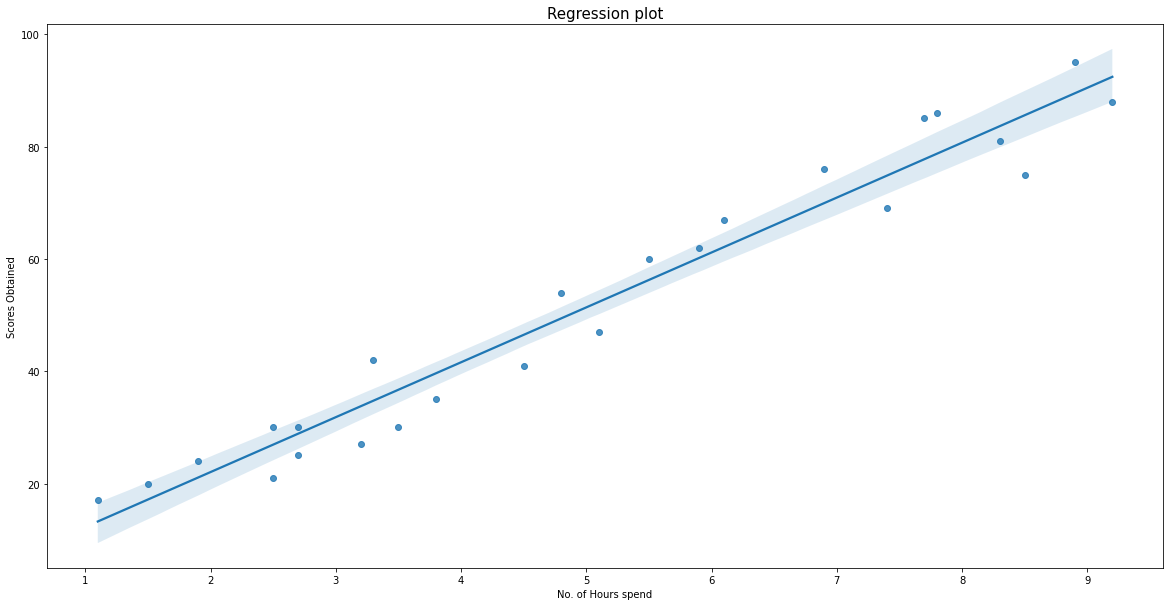

In [16]:
sns.regplot(x='Hours',y='Scores',data=marks_df)
plt.xlabel('No. of Hours spend')
plt.ylabel('Scores Obtained')
plt.title('Regression plot',size=15)
plt.show()

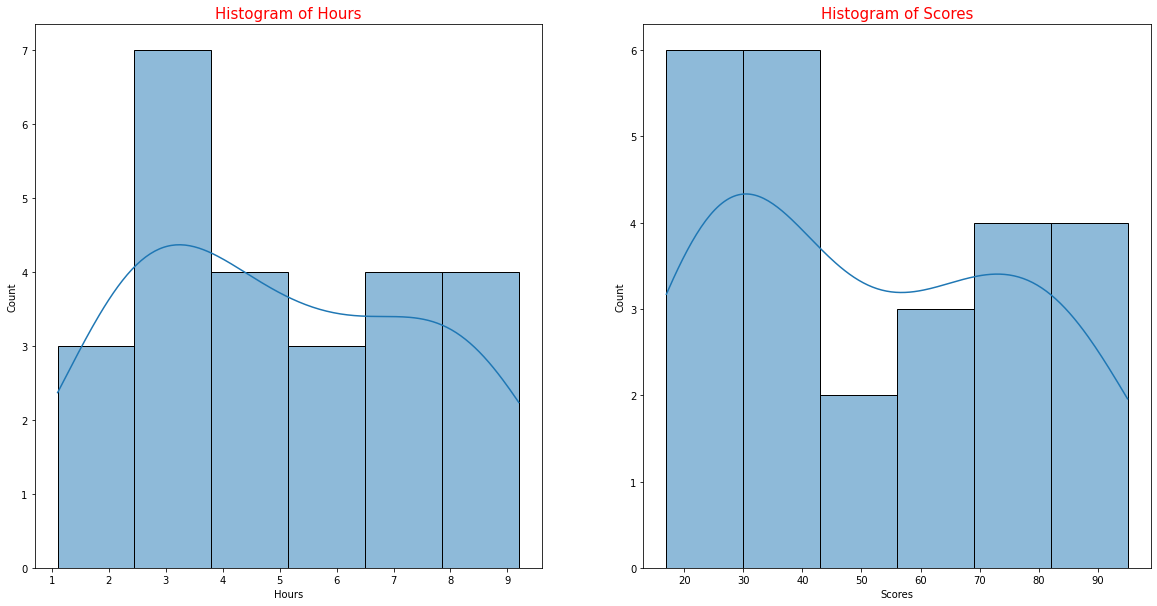

In [24]:
for i,j in enumerate(marks_df.columns):
    plt.subplot(1,2,i+1)
    sns.histplot(x=j,data=marks_df,kde=True)
    x = 'Histogram of '+ j
    plt.title(x,fontsize=15,color='red')

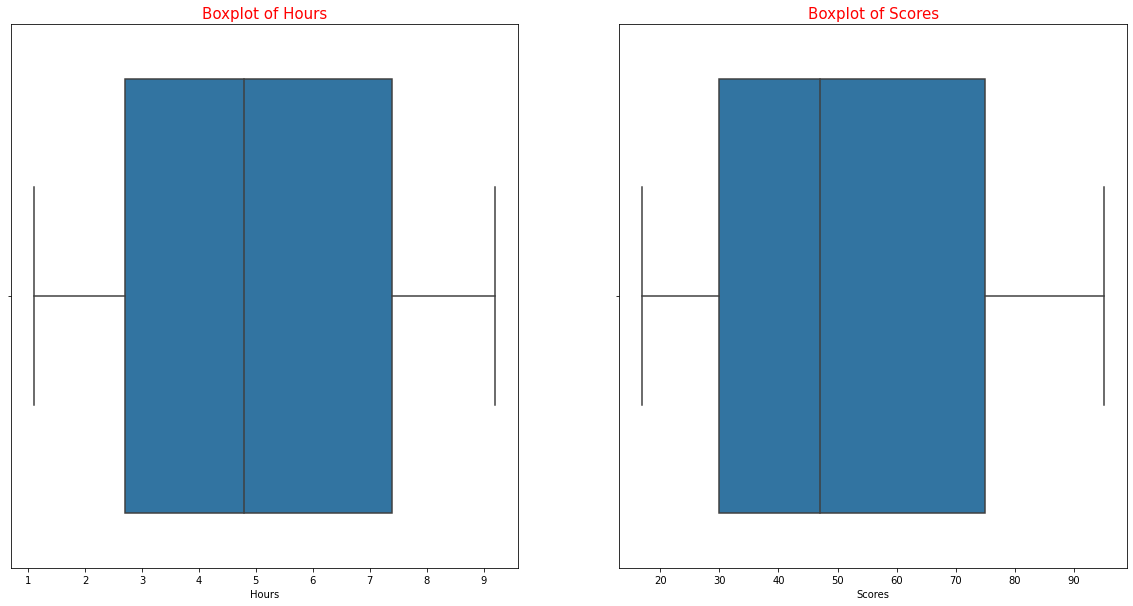

In [25]:
for i,j in enumerate(marks_df.columns):
    plt.subplot(1,2,i+1)
    sns.boxplot(x=j,data=marks_df)
    x = 'Boxplot of '+ j
    plt.title(x,fontsize=15,color='red')

* There is no outliers present in our dataset.

## Training the model to predict the scores

In [59]:
# splitting the data
y = marks_df['Scores'].values
x = marks_df['Hours'].values.reshape(-1,1)

In [60]:
# splitting the data into train and test sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30)

In [78]:
x_train

array([[2.5],
       [5.9],
       [8.9],
       [7.8],
       [4.5],
       [2.7],
       [8.5],
       [3.5],
       [7.4],
       [4.8],
       [5.1],
       [5.5],
       [2.5],
       [1.9],
       [2.7],
       [3.2],
       [6.9]])

In [63]:
x_test

array([[1.1],
       [3.8],
       [8.3],
       [6.1],
       [7.7],
       [3.3],
       [9.2],
       [1.5]])

In [64]:
y_train

array([30, 62, 95, 86, 41, 25, 75, 30, 69, 54, 47, 60, 21, 24, 30, 27, 76],
      dtype=int64)

In [65]:
y_test

array([17, 35, 81, 67, 85, 42, 88, 20], dtype=int64)

In [66]:
# Training the model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

In [70]:
# Testing the model and checking the predicted values with actual values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,17,10.875255
1,35,38.332965
2,81,84.095816
3,67,61.722867
4,85,77.994102
5,42,33.248204
6,88,93.248386
7,20,14.943064


## Finding predicted score of student who have studied for 9.25 hours/day

In [81]:
hours = [[9.25]]
own_pred = lr.predict(hours)
print("No of Hours = {}".format(hours[0][0]))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.75686195041507


**According to this model, the student can score 93.75 marks if he/she studies for 9.25 hrs/day**

## Evaluating the model

In [73]:
from sklearn.metrics import mean_absolute_error
print('Mean Absolute Error is ',mean_absolute_error(y_test,y_pred))

Mean Absolute Error is  5.486709338401769


**Small value of Mean absolute error means that the chances of incorrect forcasting through the model is very less**

In [82]:
# Checking the accuracy of the model
print('Training Accuracy is',lr.score(x_train,y_train))
print('Testing Accuracy is',lr.score(x_test,y_test))

Training Accuracy is 0.9459116864872614
Testing Accuracy is 0.9561790973266229
